In [95]:
import json

# Load GeoJSON file
with open("brownfield-land.geojson", 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

# Access features or properties
print(geojson_data['features'][:10])


[{'type': 'Feature', 'properties': {'dataset': 'brownfield-land', 'end-date': '', 'entity': '1700000', 'entry-date': '2022-11-23', 'name': 'BFR001', 'organisation-entity': '336', 'prefix': 'brownfield-land', 'reference': 'BFR001', 'start-date': '2017-11-01', 'typology': 'geography', 'deliverable': 'yes', 'hectares': '0.26', 'maximum-net-dwellings': '15', 'minimum-net-dwellings': '15', 'notes': 'Part of this site was started in 2002, no progress since so remaining as brownfield land', 'ownership-status': 'not owned by a public authority', 'planning-permission-date': '2001-10-26', 'planning-permission-status': 'permissioned', 'planning-permission-type': 'full planning permission', 'site-address': 'Glendaragh, Barn Park Road, Teignmouth TQ14 8PN', 'site-plan-url': 'http://www.teignbridge.gov.uk/planning/forms/planning-application-details/?Type=Application&Refval=01%2f03478%2fCOU'}, 'geometry': {'type': 'Point', 'coordinates': [-3.493786, 50.549744]}}, {'type': 'Feature', 'properties': {'d

In [96]:
!pip install matplotlib

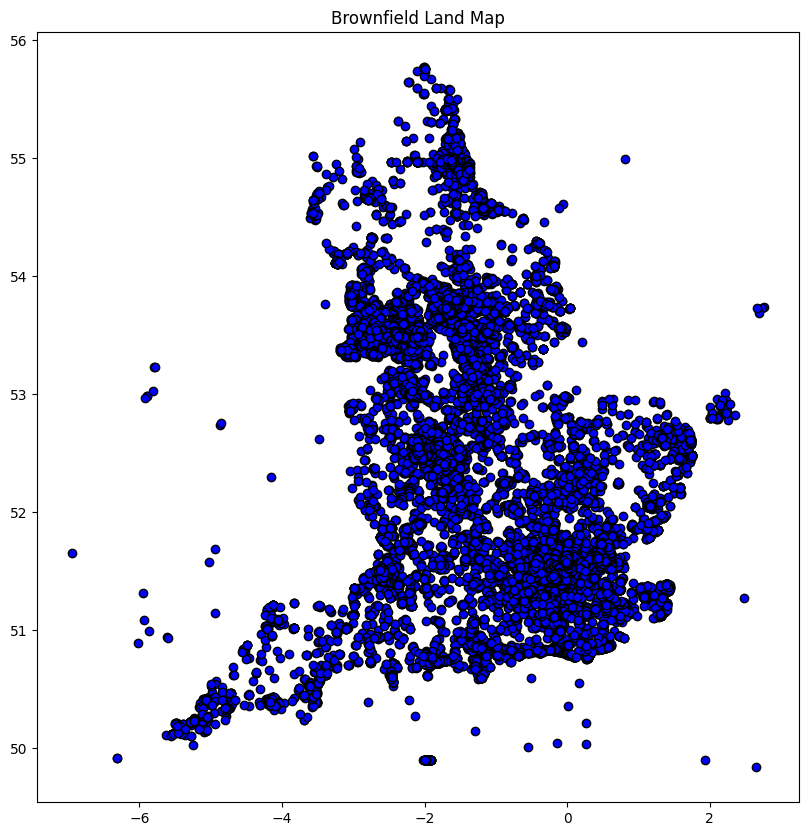

In [97]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read GeoJSON file into GeoPandas DataFrame
file_path = r"brownfield-land.geojson"
geo_df = gpd.read_file(file_path)

# Plot the map
geo_df.plot(figsize=(10, 10), color='blue', edgecolor='black')
plt.title("Brownfield Land Map")
plt.show()


In [98]:
import json

# Load GeoJSON file
with open("Lower_layer_Super_Output_Areas_December_2021_Boundaries_EW_BSC_V4_-4299016806856585929.geojson", 'r', encoding='utf-8') as f:
    geojson_lsoa = json.load(f)

# Access features or properties
print(geojson_lsoa['features'][:10])


[{'type': 'Feature', 'id': 1, 'geometry': {'type': 'Polygon', 'coordinates': [[[-0.0947444587942513, 51.5205960989071], [-0.0954551832067617, 51.5154416799019], [-0.0997229000780941, 51.5167693105518], [-0.0984983133937637, 51.5205398965728], [-0.097265559095396, 51.5215847964165], [-0.0947444587942513, 51.5205960989071]]]}, 'properties': {'FID': 1, 'LSOA21CD': 'E01000001', 'LSOA21NM': 'City of London 001A', 'LSOA21NMW': ' ', 'BNG_E': 532123, 'BNG_N': 181632, 'LAT': 51.51817, 'LONG': -0.09715, 'GlobalID': '3478c558-3297-4e2b-979e-e29dd9ff3bf5'}}, {'type': 'Feature', 'id': 2, 'geometry': {'type': 'Polygon', 'coordinates': [[[-0.0881029936678932, 51.5194124049263], [-0.0954551832067617, 51.5154416799019], [-0.0947444587942513, 51.5205960989071], [-0.0927370456903406, 51.5213890702038], [-0.0881029936678932, 51.5194124049263]]]}, 'properties': {'FID': 2, 'LSOA21CD': 'E01000002', 'LSOA21NM': 'City of London 001B', 'LSOA21NMW': ' ', 'BNG_E': 532480, 'BNG_N': 181715, 'LAT': 51.51883, 'LONG':

In [99]:
geojson_lsoa

{'type': 'FeatureCollection',
 'crs': {'type': 'name', 'properties': {'name': 'EPSG:4326'}},
 'features': [{'type': 'Feature',
   'id': 1,
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-0.0947444587942513, 51.5205960989071],
      [-0.0954551832067617, 51.5154416799019],
      [-0.0997229000780941, 51.5167693105518],
      [-0.0984983133937637, 51.5205398965728],
      [-0.097265559095396, 51.5215847964165],
      [-0.0947444587942513, 51.5205960989071]]]},
   'properties': {'FID': 1,
    'LSOA21CD': 'E01000001',
    'LSOA21NM': 'City of London 001A',
    'LSOA21NMW': ' ',
    'BNG_E': 532123,
    'BNG_N': 181632,
    'LAT': 51.51817,
    'LONG': -0.09715,
    'GlobalID': '3478c558-3297-4e2b-979e-e29dd9ff3bf5'}},
  {'type': 'Feature',
   'id': 2,
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-0.0881029936678932, 51.5194124049263],
      [-0.0954551832067617, 51.5154416799019],
      [-0.0947444587942513, 51.5205960989071],
      [-0.0927370456903406, 51.5213890702

In [100]:
import geopandas as gpd
from shapely.geometry import shape

# Assuming geojson_lsoa is the loaded GeoJSON dictionary
features = geojson_lsoa['features']

# Extract geometries
geometries = [shape(feature['geometry']) for feature in features]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(features, geometry=geometries)

# Calculate centroids
gdf['centroid'] = gdf.geometry.centroid

# Print the centroids along with the ID
print(gdf[['properties', 'centroid']])


                                              properties  \
0      {'FID': 1, 'LSOA21CD': 'E01000001', 'LSOA21NM'...   
1      {'FID': 2, 'LSOA21CD': 'E01000002', 'LSOA21NM'...   
2      {'FID': 3, 'LSOA21CD': 'E01000003', 'LSOA21NM'...   
3      {'FID': 4, 'LSOA21CD': 'E01000005', 'LSOA21NM'...   
4      {'FID': 5, 'LSOA21CD': 'E01000006', 'LSOA21NM'...   
...                                                  ...   
35667  {'FID': 35668, 'LSOA21CD': 'W01002036', 'LSOA2...   
35668  {'FID': 35669, 'LSOA21CD': 'W01002037', 'LSOA2...   
35669  {'FID': 35670, 'LSOA21CD': 'W01002038', 'LSOA2...   
35670  {'FID': 35671, 'LSOA21CD': 'W01002039', 'LSOA2...   
35671  {'FID': 35672, 'LSOA21CD': 'W01002040', 'LSOA2...   

                        centroid  
0       POINT (-0.09701 51.5185)  
1      POINT (-0.09261 51.51884)  
2       POINT (-0.0954 51.52174)  
3      POINT (-0.07612 51.51355)  
4       POINT (0.08837 51.53912)  
...                          ...  
35667  POINT (-3.18181 51.44521)  

In [101]:

gdf['properties'] = gdf['properties'].apply(lambda x: x['LSOA21CD'])

In [102]:
gdf = gdf.rename(columns={'properties': 'LSOA code'})
gdf

,type,id,geometry,LSOA code,centroid
0,Feature,1,"POLYGON ((-0.09474 51.5206, -0.09546 51.51544,...",E01000001,POINT (-0.09701 51.5185)
1,Feature,2,"POLYGON ((-0.0881 51.51941, -0.09546 51.51544,...",E01000002,POINT (-0.09261 51.51884)
2,Feature,3,"POLYGON ((-0.09453 51.52205, -0.09274 51.52139...",E01000003,POINT (-0.0954 51.52174)
3,Feature,4,"POLYGON ((-0.07589 51.5159, -0.07394 51.51445,...",E01000005,POINT (-0.07612 51.51355)
4,Feature,5,"POLYGON ((0.09328 51.53787, 0.09363 51.53767, ...",E01000006,POINT (0.08837 51.53912)
...,...,...,...,...,...
35667,Feature,35668,"POLYGON ((-3.17711 51.44702, -3.17619 51.44261...",W01002036,POINT (-3.18181 51.44521)
35668,Feature,35669,"POLYGON ((-3.16647 51.44662, -3.1718 51.44303,...",W01002037,POINT (-3.17286 51.44512)
35669,Feature,35670,"POLYGON ((-3.34342 51.3898, -3.34926 51.38719,...",W01002038,POINT (-3.34641 51.39857)
35670,Feature,35671,"POLYGON ((-3.33578 51.38279, -3.33868 51.38189...",W01002039,POINT (-3.34411 51.38497)


In [103]:
gdf.to_excel("gdf_export.xlsx", index=False)

In [104]:
import pandas as pd

# Assuming geojson_lsoa is the loaded GeoJSON dictionary
features = geojson_lsoa['features']

# Extract geometries
geometries = [shape(feature['geometry']) for feature in features]

# Create a DataFrame
df = pd.DataFrame(features)

# Extract geometries and calculate centroids
df['geometry'] = geometries
df['centroid'] = df['geometry'].apply(lambda geom: geom.centroid)

# Print the centroids along with the ID
print(df[['properties', 'centroid']])


                                              properties  \
0      {'FID': 1, 'LSOA21CD': 'E01000001', 'LSOA21NM'...   
1      {'FID': 2, 'LSOA21CD': 'E01000002', 'LSOA21NM'...   
2      {'FID': 3, 'LSOA21CD': 'E01000003', 'LSOA21NM'...   
3      {'FID': 4, 'LSOA21CD': 'E01000005', 'LSOA21NM'...   
4      {'FID': 5, 'LSOA21CD': 'E01000006', 'LSOA21NM'...   
...                                                  ...   
35667  {'FID': 35668, 'LSOA21CD': 'W01002036', 'LSOA2...   
35668  {'FID': 35669, 'LSOA21CD': 'W01002037', 'LSOA2...   
35669  {'FID': 35670, 'LSOA21CD': 'W01002038', 'LSOA2...   
35670  {'FID': 35671, 'LSOA21CD': 'W01002039', 'LSOA2...   
35671  {'FID': 35672, 'LSOA21CD': 'W01002040', 'LSOA2...   

                                             centroid  
0       POINT (-0.0970087629429991 51.51849937810878)  
1         POINT (-0.092605440611062 51.5188380857561)  
2        POINT (-0.0954004595053587 51.5217429245008)  
3       POINT (-0.0761241125899271 51.51355025564608)  

In [105]:
df

,type,id,geometry,properties,centroid
0,Feature,1,POLYGON ((-0.0947444587942513 51.5205960989071...,"{'FID': 1, 'LSOA21CD': 'E01000001', 'LSOA21NM'...",POINT (-0.0970087629429991 51.51849937810878)
1,Feature,2,POLYGON ((-0.0881029936678932 51.5194124049263...,"{'FID': 2, 'LSOA21CD': 'E01000002', 'LSOA21NM'...",POINT (-0.092605440611062 51.5188380857561)
2,Feature,3,POLYGON ((-0.0945327219241158 51.5220482084795...,"{'FID': 3, 'LSOA21CD': 'E01000003', 'LSOA21NM'...",POINT (-0.0954004595053587 51.5217429245008)
3,Feature,4,POLYGON ((-0.0758915997245415 51.5158964954293...,"{'FID': 4, 'LSOA21CD': 'E01000005', 'LSOA21NM'...",POINT (-0.0761241125899271 51.51355025564608)
4,Feature,5,"POLYGON ((0.0932836802709727 51.5378718829999,...","{'FID': 5, 'LSOA21CD': 'E01000006', 'LSOA21NM'...",POINT (0.0883710399160112 51.53911550762943)
...,...,...,...,...,...
35667,Feature,35668,"POLYGON ((-3.17711269922358 51.4470183508353, ...","{'FID': 35668, 'LSOA21CD': 'W01002036', 'LSOA2...",POINT (-3.1818101853010123 51.445205192851226)
35668,Feature,35669,"POLYGON ((-3.16647091383922 51.4466155857479, ...","{'FID': 35669, 'LSOA21CD': 'W01002037', 'LSOA2...",POINT (-3.172857802885552 51.44511516642202)
35669,Feature,35670,"POLYGON ((-3.3434155562808 51.3898019243229, -...","{'FID': 35670, 'LSOA21CD': 'W01002038', 'LSOA2...",POINT (-3.3464138453122207 51.39856712702462)
35670,Feature,35671,"POLYGON ((-3.3357839451485 51.3827916151812, -...","{'FID': 35671, 'LSOA21CD': 'W01002039', 'LSOA2...",POINT (-3.3441088389506444 51.38496999155824)


C:\Users\KKaur1\AppData\Local\Temp\1\ipykernel_9456\3929375532.py:7: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




           dataset    end-date   entity  entry-date    name  \
0  brownfield-land              1700000  2022-11-23  BFR001   
1  brownfield-land              1700001  2022-11-23  BFR002   
2  brownfield-land  2019-07-24  1700002  2022-11-23  BFR003   
3  brownfield-land  2018-03-16  1700003  2022-11-23  BFR004   
4  brownfield-land  2020-06-16  1700004  2022-11-23  BFR005   

  organisation-entity           prefix reference  start-date   typology  ...  \
0                 336  brownfield-land    BFR001  2017-11-01  geography  ...   
1                 336  brownfield-land    BFR002  2017-11-01  geography  ...   
2                 336  brownfield-land    BFR003  2017-11-01  geography  ...   
3                 336  brownfield-land    BFR004  2017-11-01  geography  ...   
4                 336  brownfield-land    BFR005  2017-11-01  geography  ...   

  minimum-net-dwellings                                              notes  \
0                    15  Part of this site was started in 2002

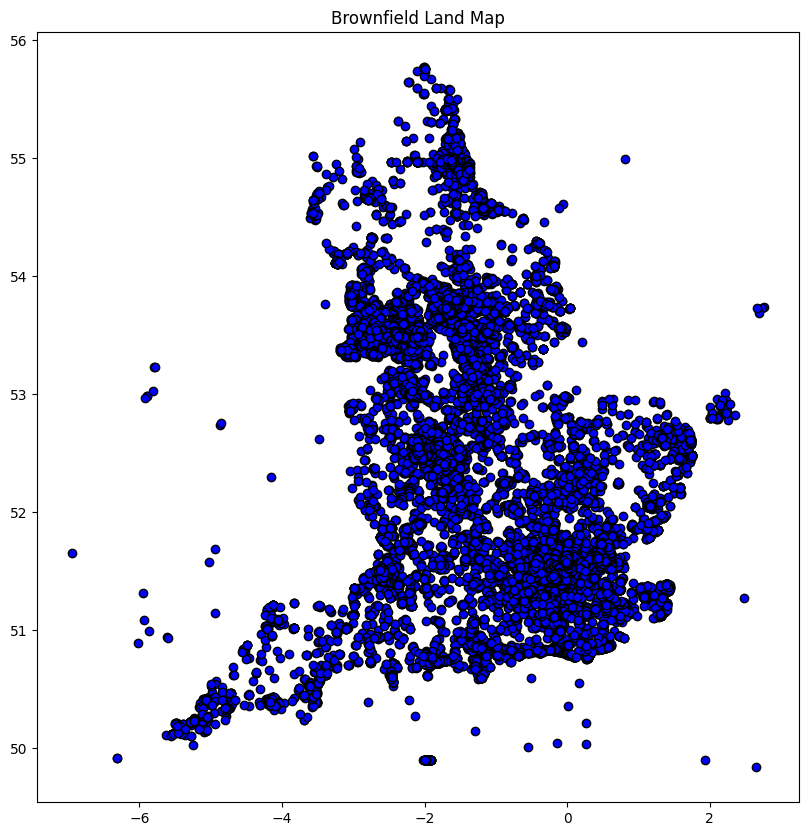

In [106]:
geo_df = gpd.read_file(file_path)

# Extract properties into a DataFrame
properties_df = pd.DataFrame(geo_df.drop(columns='geometry'))

# Calculate centroids
geo_df['centroid'] = geo_df.geometry.centroid

# Combine properties and centroids into a new DataFrame
combined_df = properties_df.copy()
combined_df['centroid'] = geo_df['centroid']

# Display the first few rows of the combined DataFrame
print(combined_df.head())

# Plot the map
geo_df.plot(figsize=(10, 10), color='blue', edgecolor='black')
plt.title("Brownfield Land Map")
plt.show()

In [107]:
combined_df

,dataset,end-date,entity,entry-date,name,organisation-entity,prefix,reference,start-date,typology,...,minimum-net-dwellings,notes,ownership-status,planning-permission-date,planning-permission-history,planning-permission-status,planning-permission-type,site-address,site-plan-url,centroid
0,brownfield-land,,1700000,2022-11-23,BFR001,336,brownfield-land,BFR001,2017-11-01,geography,...,15,"Part of this site was started in 2002, no prog...",not owned by a public authority,2001/10/26,None,permissioned,full planning permission,"Glendaragh, Barn Park Road, Teignmouth TQ14 8PN",http://www.teignbridge.gov.uk/planning/forms/p...,POINT (-3.49379 50.54974)
1,brownfield-land,,1700001,2022-11-23,BFR002,336,brownfield-land,BFR002,2017-11-01,geography,...,6,"Groundworks commenced keeping this live, so th...",not owned by a public authority,2006/03/22,None,permissioned,full planning permission,"Rosemary Avenue, Newton Abbot TQ12 1SB",http://www.teignbridge.gov.uk/planning/forms/p...,POINT (-3.62626 50.53384)
2,brownfield-land,2019-07-24,1700002,2022-11-23,BFR003,336,brownfield-land,BFR003,2017-11-01,geography,...,9,Site completed,not owned by a public authority,2008/07/01,None,permissioned,full planning permission,"Platway House, Torquay Road, Shaldon TQ14 0AU",http://www.teignbridge.gov.uk/planning/forms/p...,POINT (-3.51067 50.5399)
3,brownfield-land,2018-03-16,1700003,2022-11-23,BFR004,336,brownfield-land,BFR004,2017-11-01,geography,...,9,Site completed,not owned by a public authority,2012/07/31,None,permissioned,full planning permission,"Shapters Yard, Strand Hill, Dawlish EX7 9PS",http://www.teignbridge.gov.uk/planning/forms/p...,POINT (-3.46679 50.58151)
4,brownfield-land,2020-06-16,1700004,2022-11-23,BFR005,336,brownfield-land,BFR005,2017-11-01,geography,...,18,started - therefore no longer on BFR - 10 comp...,not owned by a public authority,2013/01/21,None,permissioned,full planning permission,"Former Wolborough Hospital, Old Totnes Road, N...",http://www.teignbridge.gov.uk/planning/forms/p...,POINT (-3.62069 50.52059)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32305,brownfield-land,,1737109,2024-07-15,BAS0141,35,brownfield-land,BAS0141,2024-07-08,geography,...,10,Deliverable within 3 years. Alternate referenc...,not owned by a public authority,None,None,not permissioned,None,part developed land in 2014,https://www.basildon.gov.uk/icm/mediaaccess.cf...,POINT (0.53565 51.58247)
32306,brownfield-land,,1737110,2024-07-15,BAS0142,35,brownfield-land,BAS0142,2024-07-08,geography,...,None,Planning permission granted. Works have not co...,not owned by a public authority,2022/07/17,None,permissioned,other,26 High Road North Laindon Essex SS15 4DP,https://www.basildon.gov.uk/icm/mediaaccess.cf...,POINT (0.42854 51.5852)
32307,brownfield-land,,1737111,2024-07-15,BAS0143,35,brownfield-land,BAS0143,2024-07-08,geography,...,5,Planning permission granted. Works have not co...,not owned by a public authority,2023/05/15,None,permissioned,full planning permission,Hatches Farm Hatches Farm Road Little Burstead...,https://www.basildon.gov.uk/icm/mediaaccess.cf...,POINT (0.39834 51.60358)
32308,brownfield-land,,1737112,2024-07-15,BAS0144,35,brownfield-land,BAS0144,2024-07-08,geography,...,75,Planning permission granted. Works have not co...,not owned by a public authority,2023/05/13,None,permissioned,full planning permission,Fairview Coxes Farm Road Billericay Essex CM11...,https://www.basildon.gov.uk/icm/mediaaccess.cf...,POINT (0.4403 51.61007)


In [108]:
weather= pd.DataFrame(gdf['LSOA code'])

In [109]:
weather

,LSOA code
0,E01000001
1,E01000002
2,E01000003
3,E01000005
4,E01000006
...,...
35667,W01002036
35668,W01002037
35669,W01002038
35670,W01002039


In [110]:
import numpy as np

weather['avg_precip_mm'] = weather.apply(lambda x: np.random.uniform(100, 2274), axis=1)

In [111]:
weather['cloud_okta'] = weather['avg_precip_mm'].apply(
    lambda x: np.random.randint(5, 9) if x > 1000 else 
              np.random.randint(2, 5) if 200 < x <= 1000 else 
              np.random.randint(0, 3)
)

In [112]:
weather

,LSOA code,avg_precip_mm,cloud_okta
0,E01000001,1473.922251,7
1,E01000002,1269.901028,8
2,E01000003,1742.196624,7
3,E01000005,1038.203798,8
4,E01000006,745.733598,3
...,...,...,...
35667,W01002036,1667.130120,6
35668,W01002037,1310.784422,6
35669,W01002038,1160.915963,5
35670,W01002039,1328.599085,6


In [113]:
weather['wind_mph'] = weather['avg_precip_mm'].apply(
    lambda x: round(np.random.uniform(20, 63), 1) if x > 1800 else 
              round(np.random.uniform(0, 50), 1) if 800 < x <= 1800 else 
              round(np.random.uniform(0, 25), 1)
)

In [114]:
weather

,LSOA code,avg_precip_mm,cloud_okta,wind_mph
0,E01000001,1473.922251,7,2.8
1,E01000002,1269.901028,8,30.5
2,E01000003,1742.196624,7,47.7
3,E01000005,1038.203798,8,18.8
4,E01000006,745.733598,3,12.6
...,...,...,...,...
35667,W01002036,1667.130120,6,3.4
35668,W01002037,1310.784422,6,46.0
35669,W01002038,1160.915963,5,3.5
35670,W01002039,1328.599085,6,25.9


In [115]:
weather.to_excel("dummy_weather.xlsx", index=False)

In [116]:
weather

,LSOA code,avg_precip_mm,cloud_okta,wind_mph
0,E01000001,1473.922251,7,2.8
1,E01000002,1269.901028,8,30.5
2,E01000003,1742.196624,7,47.7
3,E01000005,1038.203798,8,18.8
4,E01000006,745.733598,3,12.6
...,...,...,...,...
35667,W01002036,1667.130120,6,3.4
35668,W01002037,1310.784422,6,46.0
35669,W01002038,1160.915963,5,3.5
35670,W01002039,1328.599085,6,25.9


In [117]:
bfl=pd.read_csv("brownfield-land.csv")

C:\Users\KKaur1\AppData\Local\Temp\1\ipykernel_9456\9445813.py:1: DtypeWarning:

Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.



In [118]:
bfl

,dataset,end-date,entity,entry-date,geojson,geometry,name,organisation-entity,point,longitude,...,organisation,ownership-status,planning-permission-date,planning-permission-history,planning-permission-status,planning-permission-type,site,site-address,site-categories,site-plan-url
0,brownfield-land,NaN,1700000,23/11/2022,NaN,NaN,BFR001,336.0,POINT(-3.493786 50.549744),-3.493786,...,NaN,not owned by a public authority,26/10/2001,NaN,permissioned,full planning permission,NaN,"Glendaragh, Barn Park Road, Teignmouth TQ14 8PN",NaN,http://www.teignbridge.gov.uk/planning/forms/p...
1,brownfield-land,NaN,1700001,23/11/2022,NaN,NaN,BFR002,336.0,POINT(-3.626255 50.533836),-3.626255,...,NaN,not owned by a public authority,22/03/2006,NaN,permissioned,full planning permission,NaN,"Rosemary Avenue, Newton Abbot TQ12 1SB",NaN,http://www.teignbridge.gov.uk/planning/forms/p...
2,brownfield-land,24/07/2019,1700002,23/11/2022,NaN,NaN,BFR003,336.0,POINT(-3.510666 50.5399),-3.510666,...,NaN,not owned by a public authority,01/07/2008,NaN,permissioned,full planning permission,NaN,"Platway House, Torquay Road, Shaldon TQ14 0AU",NaN,http://www.teignbridge.gov.uk/planning/forms/p...
3,brownfield-land,16/03/2018,1700003,23/11/2022,NaN,NaN,BFR004,336.0,POINT(-3.466788 50.58151),-3.466788,...,NaN,not owned by a public authority,31/07/2012,NaN,permissioned,full planning permission,NaN,"Shapters Yard, Strand Hill, Dawlish EX7 9PS",NaN,http://www.teignbridge.gov.uk/planning/forms/p...
4,brownfield-land,16/06/2020,1700004,23/11/2022,NaN,NaN,BFR005,336.0,POINT(-3.620686 50.520592),-3.620686,...,NaN,not owned by a public authority,21/01/2013,NaN,permissioned,full planning permission,NaN,"Former Wolborough Hospital, Old Totnes Road, N...",NaN,http://www.teignbridge.gov.uk/planning/forms/p...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34427,brownfield-land,NaN,1737109,15/07/2024,NaN,NaN,BAS0141,35.0,POINT(0.535653 51.58247),0.535653,...,NaN,not owned by a public authority,NaN,NaN,not permissioned,NaN,NaN,part developed land in 2014,NaN,https://www.basildon.gov.uk/icm/mediaaccess.cf...
34428,brownfield-land,NaN,1737110,15/07/2024,NaN,NaN,BAS0142,35.0,POINT(0.428538 51.5852),0.428538,...,NaN,not owned by a public authority,17/07/2022,NaN,permissioned,other,NaN,26 High Road North Laindon Essex SS15 4DP,NaN,https://www.basildon.gov.uk/icm/mediaaccess.cf...
34429,brownfield-land,NaN,1737111,15/07/2024,NaN,NaN,BAS0143,35.0,POINT(0.398338 51.60358),0.398338,...,NaN,not owned by a public authority,15/05/2023,NaN,permissioned,full planning permission,NaN,Hatches Farm Hatches Farm Road Little Burstead...,NaN,https://www.basildon.gov.uk/icm/mediaaccess.cf...
34430,brownfield-land,NaN,1737112,15/07/2024,NaN,NaN,BAS0144,35.0,POINT(0.440303 51.61007),0.440303,...,NaN,not owned by a public authority,13/05/2023,NaN,permissioned,full planning permission,NaN,Fairview Coxes Farm Road Billericay Essex CM11...,NaN,https://www.basildon.gov.uk/icm/mediaaccess.cf...


In [119]:
# dropping NAs from the dataset before converting to string, important has it will convert NAs to nan strings
bfl =bfl.dropna(subset=['notes'])

# counts for the history text column
bfl_t= bfl['notes'].str.split(expand=True).unstack().value_counts()

In [120]:
!pip install plotly

In [121]:
!pip install spacy

  Using cached spacy-3.8.2.tar.gz (1.3 MB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [130 lines of output]
      Ignoring numpy: markers 'python_version < "3.9"' don't match your environment
        Using cached setuptools-75.6.0-py3-none-any.whl.metadata (6.7 kB)
        Using cached Cython-0.29.37-py2.py3-none-any.whl.metadata (3.1 kB)
        Using cached cymem-2.0.10-cp313-cp313-win_amd64.whl.metadata (8.6 kB)
        Using cached preshed-3.0.9.tar.gz (14 kB)
        Installing build dependencies: started
        Installing build dependencies: finished with status 'done'
        Getting requirements to build wheel: started
        Getting requirements to build wheel: finished with status 'done'
        Preparing metadata (pyproject.toml): started
        Preparing metadata (pyproject.toml): finished with status 'done'
        Using cached murmurhash-1.0.11-cp313-cp313-win_amd64.whl.metadata (2.0 kB)
        Using cached thinc-8.

In [122]:
!pip install nltk

In [123]:
!pip install wordcloud

In [124]:
# guidance for text preprocessing was used from Shanawad V. (2022) Elghali R. (2021), Anistropic (2018)
# nltk downloads
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)
#nlp = spacy.load('en_core_web_sm')


True

In [125]:
# general libaries for basic data cleaning
import plotly.offline as py
import numpy as np
import pandas as pd
import os
import re
import string

from pprint import pprint



# nltyk packages and spacy. Helps with pre-processing text
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet, stopwords
from nltk.util import ngrams
from nltk import word_tokenize, pos_tag


#from nltk.tokenize import word_tokenize




# Data visualisation
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import pickle 

from pprint import pprint
from IPython.core.display import display, HTML
import seaborn as sns

C:\Users\KKaur1\AppData\Local\Temp\1\ipykernel_9456\2045677045.py:34: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display



In [126]:
!pip install seaborn

In [127]:
# nltk downloads
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)
#nlp = spacy.load('en_core_web_sm')
stopwords = set(stopwords.words('english'))

In [135]:
from nltk.corpus import wordnet, stopwords
stopwords = set(stopwords.words('english'))

In [94]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KKaur1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [143]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [150]:
wnl = WordNetLemmatizer()
ps = PorterStemmer()
from nltk import word_tokenize, pos_tag

In [153]:

# controlling how the words get converted
def tagger(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [168]:

def drop_stopwords(text):
    # tokenises
    tokens = text
    dropped = [word for word in tokens if word.lower() not in stopwords]
    final_text = ' '.join(dropped)
    return final_text

# Shanawad V. (2022) Elghali R. (2021)
def text_clean(text):
    # convert text to string
    text = str(text)
    # identified some problematic names which could negatively impact. So combined

    text = re.sub(r'(Sector)\s+(\d+)', r'\1\2', text)

    # removing, non words, punction and web links and new lines

    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\[.*?\]', ' ', text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text) 
    text = re.sub(r'<.*?>+', ' ', text)
    text = re.sub(r'\n', ' ', text)
    # removing digits not attached to names
    text = re.sub(r'\b\d+\b', '', text)
    
    return text
def lemma_tag(sentence):
    sentence_words = word_tokenize(sentence)
    pos_tags = nltk.pos_tag(sentence_words)
    lemmatized_words = [wnl.lemmatize(word, pos=tagger(tag)) for word, tag in pos_tags]
    lemmatized_words =[word.lower() for word in lemmatized_words]
    # Join the lemmatized words into a single string
    lemmatized_sentence = ' '.join(lemmatized_words)
    return lemmatized_words

In [171]:
word_tokenize("hello world")

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\KKaur1/nltk_data'
    - 'c:\\ProgramData\\miniforge3\\envs\\testing-env\\nltk_data'
    - 'c:\\ProgramData\\miniforge3\\envs\\testing-env\\share\\nltk_data'
    - 'c:\\ProgramData\\miniforge3\\envs\\testing-env\\lib\\nltk_data'
    - 'C:\\Users\\KKaur1\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [139]:
bfl.columns

Index(['dataset', 'end-date', 'entity', 'entry-date', 'geojson', 'geometry',
       'name', 'organisation-entity', 'point', 'longitude', 'latitude',
       'prefix', 'reference', 'start-date', 'typology', 'brownfield-land',
       'deliverable', 'hazardous-substances', 'hectares',
       'maximum-net-dwellings', 'minimum-net-dwellings', 'notes',
       'organisation', 'ownership-status', 'planning-permission-date',
       'planning-permission-history', 'planning-permission-status',
       'planning-permission-type', 'site', 'site-address', 'site-categories',
       'site-plan-url'],
      dtype='object')

In [140]:
# dropping NAs from the dataset before converting to string, important has it will convert NAs to nan strings
bfl =bfl.dropna(subset=['notes'])

# counts for the history text column
bf11= bfl['notes'].str.split(expand=True).unstack().value_counts()


In [158]:
# nltk downloads
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)
#nlp = spacy.load('en_core_web_sm')
#stopwords = set(stopwords.words('english'))

True

In [162]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KKaur1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KKaur1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\KKaur1\AppData\Roaming\nltk_data...


True

In [165]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KKaur1\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [169]:
example=bfl['notes'][0]

print("Original:",example)
clean= text_clean(example)
print("\ncleaning:",clean)
lem= lemma_tag(clean)
print("\nLemmatisation:",lem)
stpword= drop_stopwords(lem)
print("\nStop word removal:",stpword)

Original: Part of this site was started in 2002, no progress since so remaining as brownfield land

cleaning: Part of this site was started in   no progress since so remaining as brownfield land


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\KKaur1/nltk_data'
    - 'c:\\ProgramData\\miniforge3\\envs\\testing-env\\nltk_data'
    - 'c:\\ProgramData\\miniforge3\\envs\\testing-env\\share\\nltk_data'
    - 'c:\\ProgramData\\miniforge3\\envs\\testing-env\\lib\\nltk_data'
    - 'C:\\Users\\KKaur1\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [170]:
word_tokenize()

TypeError: word_tokenize() missing 1 required positional argument: 'text'

In [145]:
bfl['lemma']=bfl['notes'].apply(text_clean).apply(lemma_tag).apply(drop_stopwords)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\KKaur1/nltk_data'
    - 'c:\\ProgramData\\miniforge3\\envs\\testing-env\\nltk_data'
    - 'c:\\ProgramData\\miniforge3\\envs\\testing-env\\share\\nltk_data'
    - 'c:\\ProgramData\\miniforge3\\envs\\testing-env\\lib\\nltk_data'
    - 'C:\\Users\\KKaur1\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


,dataset,end-date,entity,entry-date,geojson,geometry,name,organisation-entity,point,longitude,...,organisation,ownership-status,planning-permission-date,planning-permission-history,planning-permission-status,planning-permission-type,site,site-address,site-categories,site-plan-url
0,brownfield-land,NaN,1700000,23/11/2022,NaN,NaN,BFR001,336.0,POINT(-3.493786 50.549744),-3.493786,...,NaN,not owned by a public authority,26/10/2001,NaN,permissioned,full planning permission,NaN,"Glendaragh, Barn Park Road, Teignmouth TQ14 8PN",NaN,http://www.teignbridge.gov.uk/planning/forms/p...
1,brownfield-land,NaN,1700001,23/11/2022,NaN,NaN,BFR002,336.0,POINT(-3.626255 50.533836),-3.626255,...,NaN,not owned by a public authority,22/03/2006,NaN,permissioned,full planning permission,NaN,"Rosemary Avenue, Newton Abbot TQ12 1SB",NaN,http://www.teignbridge.gov.uk/planning/forms/p...
2,brownfield-land,24/07/2019,1700002,23/11/2022,NaN,NaN,BFR003,336.0,POINT(-3.510666 50.5399),-3.510666,...,NaN,not owned by a public authority,01/07/2008,NaN,permissioned,full planning permission,NaN,"Platway House, Torquay Road, Shaldon TQ14 0AU",NaN,http://www.teignbridge.gov.uk/planning/forms/p...
3,brownfield-land,16/03/2018,1700003,23/11/2022,NaN,NaN,BFR004,336.0,POINT(-3.466788 50.58151),-3.466788,...,NaN,not owned by a public authority,31/07/2012,NaN,permissioned,full planning permission,NaN,"Shapters Yard, Strand Hill, Dawlish EX7 9PS",NaN,http://www.teignbridge.gov.uk/planning/forms/p...
4,brownfield-land,16/06/2020,1700004,23/11/2022,NaN,NaN,BFR005,336.0,POINT(-3.620686 50.520592),-3.620686,...,NaN,not owned by a public authority,21/01/2013,NaN,permissioned,full planning permission,NaN,"Former Wolborough Hospital, Old Totnes Road, N...",NaN,http://www.teignbridge.gov.uk/planning/forms/p...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34427,brownfield-land,NaN,1737109,15/07/2024,NaN,NaN,BAS0141,35.0,POINT(0.535653 51.58247),0.535653,...,NaN,not owned by a public authority,NaN,NaN,not permissioned,NaN,NaN,part developed land in 2014,NaN,https://www.basildon.gov.uk/icm/mediaaccess.cf...
34428,brownfield-land,NaN,1737110,15/07/2024,NaN,NaN,BAS0142,35.0,POINT(0.428538 51.5852),0.428538,...,NaN,not owned by a public authority,17/07/2022,NaN,permissioned,other,NaN,26 High Road North Laindon Essex SS15 4DP,NaN,https://www.basildon.gov.uk/icm/mediaaccess.cf...
34429,brownfield-land,NaN,1737111,15/07/2024,NaN,NaN,BAS0143,35.0,POINT(0.398338 51.60358),0.398338,...,NaN,not owned by a public authority,15/05/2023,NaN,permissioned,full planning permission,NaN,Hatches Farm Hatches Farm Road Little Burstead...,NaN,https://www.basildon.gov.uk/icm/mediaaccess.cf...
34430,brownfield-land,NaN,1737112,15/07/2024,NaN,NaN,BAS0144,35.0,POINT(0.440303 51.61007),0.440303,...,NaN,not owned by a public authority,13/05/2023,NaN,permissioned,full planning permission,NaN,Fairview Coxes Farm Road Billericay Essex CM11...,NaN,https://www.basildon.gov.uk/icm/mediaaccess.cf...


In [ ]:
text_lda_lemma = bfl['lemma'].values

In [ ]:
# word cloud
lda_text = ' '.join(bfl['lemma'])

# create word cload
wordcloud = WordCloud(width=1000, height=400).generate(lda_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# word cloud
lda_text = ' '.join(bfl_t['notes'])

# create word cload
wordcloud = WordCloud(width=1000, height=400).generate(lda_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()